In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:10000]
x_train = train_images[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

Using TensorFlow backend.


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(8,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(8,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# **Under parameterized Conv2D**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 8)           584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 72)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 5s 92us/step - loss: 0.7591 - acc: 0.7703 - val_loss: 0.3416 - val_acc: 0.8960
Epoch 2/5
50000/50000 [==============================] - 3s 64us/step - loss: 0.2733 - acc: 0.9170 - val_loss: 0.2128 - val_acc: 0.9354
Epoch 3/5
50000/50000 [==============================] - 3s 63us/step - loss: 0.1881 - acc: 0.9433 - val_loss: 0.1624 - val_acc: 0.9533
Epoch 4/5
50000/50000 [==============================] - 3s 64us/step - loss: 0.1486 - acc: 0.9554 - val_loss: 0.1376 - val_acc: 0.9617
Epoch 5/5
50000/50000 [==============================] - 3s 65us/step - loss: 0.1249 - acc: 0.9621 - val_loss: 0.1202 - val_acc: 0.9666


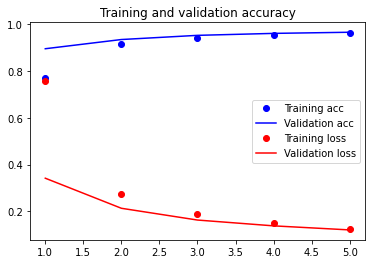

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# **Over-parameterization**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 32)          36896     
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 9s 174us/step - loss: 0.2527 - acc: 0.9189 - val_loss: 0.0868 - val_acc: 0.9734
Epoch 2/5
50000/50000 [==============================] - 8s 161us/step - loss: 0.0612 - acc: 0.9807 - val_loss: 0.0605 - val_acc: 0.9814
Epoch 3/5
50000/50000 [==============================] - 8s 164us/step - loss: 0.0397 - acc: 0.9870 - val_loss: 0.0916 - val_acc: 0.9767
Epoch 4/5
50000/50000 [==============================] - 8s 163us/step - loss: 0.0293 - acc: 0.9907 - val_loss: 0.0472 - val_acc: 0.9886
Epoch 5/5
50000/50000 [==============================] - 8s 161us/step - loss: 0.0231 - acc: 0.9924 - val_loss: 0.0411 - val_acc: 0.9891


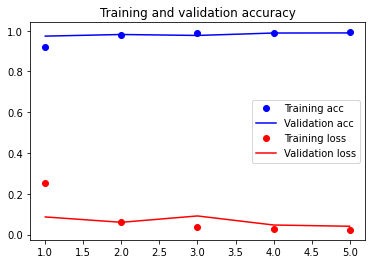

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()
plt.show()

no. of paramter = number of smaples

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(19,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# **Practicle Degree of parameterization**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 19)          10963     
_________________________________________________________________
flatten_3 (Flatten)          (None, 171)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 4s 85us/step - loss: 0.4421 - acc: 0.8639 - val_loss: 0.1555 - val_acc: 0.9531
Epoch 2/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.1154 - acc: 0.9651 - val_loss: 0.1067 - val_acc: 0.9672
Epoch 3/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.0798 - acc: 0.9745 - val_loss: 0.1047 - val_acc: 0.9689
Epoch 4/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.0610 - acc: 0.9807 - val_loss: 0.0878 - val_acc: 0.9740
Epoch 5/5
50000/50000 [==============================] - 4s 76us/step - loss: 0.0496 - acc: 0.9848 - val_loss: 0.0606 - val_acc: 0.9816


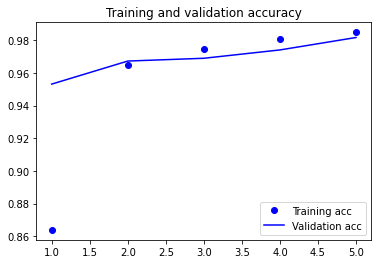

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

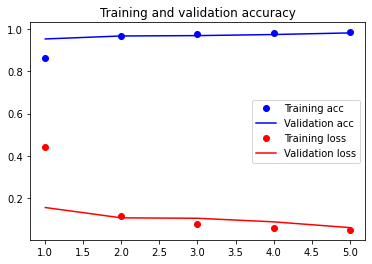

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.plot(epochs, loss, 'bo', label='Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color='red')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 109us/step


In [ ]:
test_acc

0.9851999878883362